In [1]:
import sys
sys.path.append('..')
import module
df = module.preprocess_data(module.get_data())


c:\workspace\sakurasaku\eda\module.py:230: FutureWarning: The provided callable <function max at 0x000001E267D12170> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  ret_df["max_date"] = ret_df.groupby(COL_PLACE_CODE).transform(np.max)[COL_DATE]


In [2]:
df = module.preprocess_data(module.get_data())
df

c:\workspace\sakurasaku\eda\module.py:230: FutureWarning: The provided callable <function max at 0x000001E267D12170> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  ret_df["max_date"] = ret_df.groupby(COL_PLACE_CODE).transform(np.max)[COL_DATE]


,mankai_date,kaika_date,lat,lon
34873,91.0,83.0,34.613861,135.734324
49693,95.0,91.0,36.659838,136.660113
49774,89.0,83.0,34.350320,136.401451
49887,91.0,87.0,35.072679,135.007624
56185,128.0,123.0,43.340985,141.895581
...,...,...,...,...
57180,87.0,77.0,31.196455,130.534394
57181,80.0,71.0,31.824745,130.340031
57182,80.0,73.0,31.825011,130.686172
57183,91.0,83.0,31.617441,130.577091


In [3]:
#1.普通に予測
# データから満開日のデータを削ったデータで、開花日を予測するモデルを作成
kaika_model  = module.create_linear_regression_model(df.drop(columns=module.COL_MANKAI), module.COL_KAIKA)
# 開花日を削ったデータで、満開日を予測するモデルを作成
mankai_model = module.create_linear_regression_model(df.drop(columns=module.COL_KAIKA), module.COL_MANKAI)


train start!
train end!
mae↓
2.5679530193923314
train start!
train end!
mae↓
2.7444647222285754


In [16]:
#2.予測で得た開花日を満開日予測に使う
# データから満開日のデータを削ったデータで、開花日を予測するモデルを作成
kaika_model  = module.create_linear_regression_model(df.drop(columns=module.COL_MANKAI), module.COL_KAIKA)
df.kaika_date = kaika_model.predict(df.drop(columns=[module.COL_MANKAI, module.COL_KAIKA]))
# 開花日を削ったデータで、満開日を予測するモデルを作成
mankai_model = module.create_linear_regression_model(df, module.COL_MANKAI)
#→別に向上しない


train start!
train end!
mae↓
2.3661073100811337e-14
train start!
train end!
mae↓
2.71859375


In [9]:
# いろんな非線形回帰やってみる
# １．多項式
df = module.preprocess_data(module.get_data())
kaika_model = module.create_polynomial_linear_regression_model(df.drop(columns=module.COL_MANKAI), module.COL_KAIKA, 2)
mankai_model = module.create_polynomial_linear_regression_model(df.drop(columns=module.COL_KAIKA), module.COL_MANKAI, 2)


train start!
train end!
mae↓
2.5508254715885617
train start!
train end!
mae↓
2.643691403388217


In [10]:
# 多項式　3次
kaika_model = module.create_polynomial_linear_regression_model(df.drop(columns=module.COL_MANKAI), module.COL_KAIKA, 3)
mankai_model = module.create_polynomial_linear_regression_model(df.drop(columns=module.COL_KAIKA), module.COL_MANKAI, 3)


train start!
train end!
mae↓
2.6110199795842393
train start!
train end!
mae↓
2.2443398378889197


In [11]:
# 4次
kaika_model = module.create_polynomial_linear_regression_model(df.drop(columns=module.COL_MANKAI), module.COL_KAIKA, 3)
mankai_model = module.create_polynomial_linear_regression_model(df.drop(columns=module.COL_KAIKA), module.COL_MANKAI, 3)


train start!
train end!
mae↓
2.6820507221682237
train start!
train end!
mae↓
2.463831943452933


<Axes: xlabel='lat', ylabel='lon'>

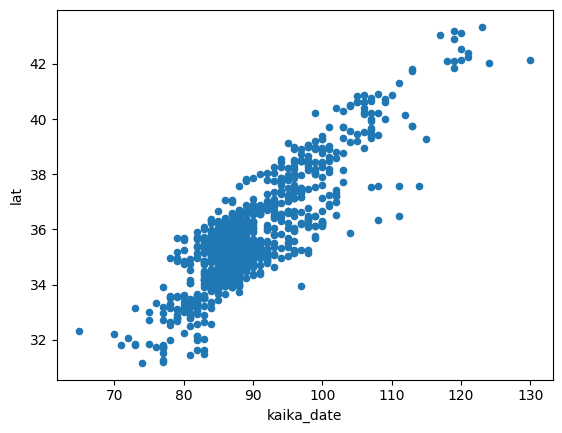

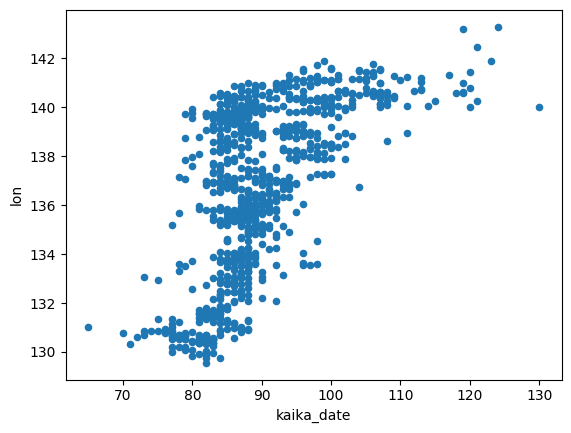

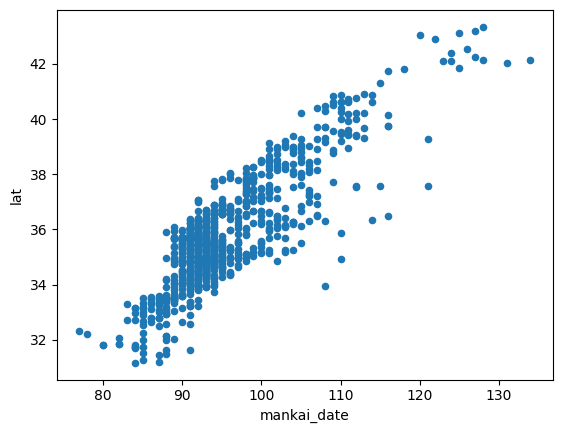

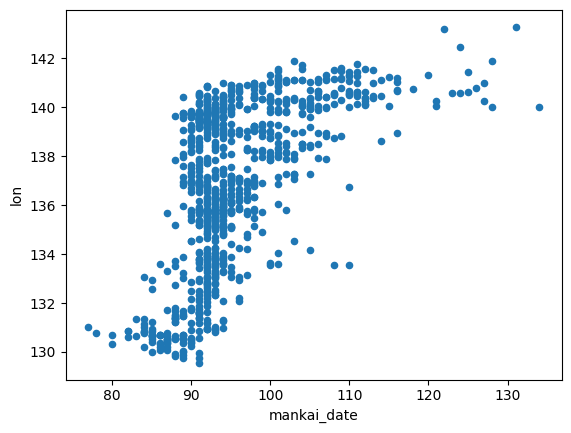

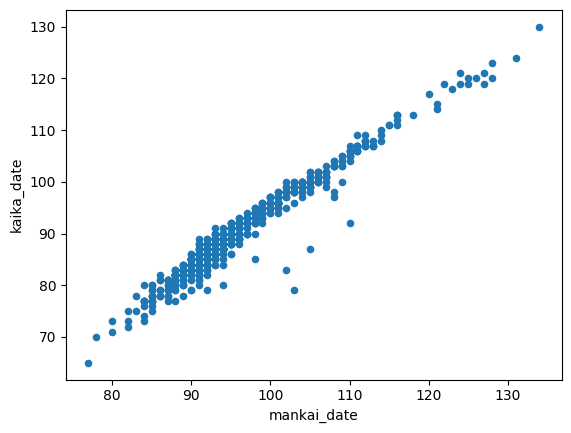

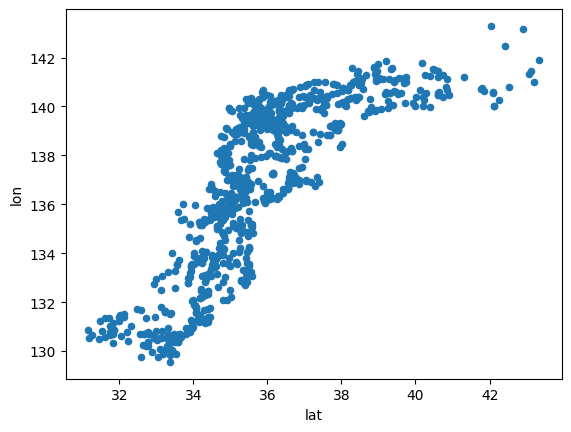

In [14]:
# あらためてdfを散布図にする
df.plot.scatter(x=module.COL_KAIKA, y="lat")
df.plot.scatter(x=module.COL_KAIKA, y="lon")
df.plot.scatter(x=module.COL_MANKAI, y="lat")
df.plot.scatter(x=module.COL_MANKAI, y="lon")
df.plot.scatter(x=module.COL_MANKAI, y=module.COL_KAIKA)
df.plot.scatter(x="lat", y="lon")


In [6]:
#対数
kaika_model = module.create_log_linear_regression_model(df.drop(columns=module.COL_MANKAI), module.COL_KAIKA)
mankai_model = module.create_log_linear_regression_model(df.drop(columns=module.COL_KAIKA), module.COL_MANKAI)


train start!
train end!
mae↓
2.5551696900556307
train start!
train end!
mae↓
2.76296473073323


In [5]:
kaika_model = module.create_sqrt_linear_regression_model(df.drop(columns=module.COL_MANKAI), module.COL_KAIKA)
mankai_model = module.create_sqrt_linear_regression_model(df.drop(columns=module.COL_KAIKA), module.COL_MANKAI)


train start!
train end!
mae↓
2.9933683597273544
train start!
train end!
mae↓
2.7774850785958787


In [3]:
#TODO:都道府県入のデータ
def preprocess_data(df):
  """
  データの前処理を行う

  Args:
      df (pd.DataFrame): 元データ

  Returns:
      pd.DataFrame: 前処理を行ったデータ
  """
  # 不要なcol削除 都道府県列は残す
  ret_df = df.drop(columns=[module.COL_CODE, module.COL_PLACE_CODE, "meter", "tavg", "tmin", "tmax", "prcp", "prefecture_en", "spot_name"])
  
  # 最新日のみにフィルタリング
  max_date = max(ret_df[module.COL_DATE])
  ret_df = ret_df[ret_df[module.COL_DATE] == max_date]

  # フィルタリングしたらdate列も不要
  ret_df = ret_df.drop(columns=[module.COL_DATE])

  # 日付を差に変換
  ret_df[module.COL_KAIKA]  = ret_df[module.COL_KAIKA].apply(module.minus_base_date)
  ret_df[module.COL_MANKAI] = ret_df[module.COL_MANKAI].apply(module.minus_base_date)
  
  return ret_df

# 都道府県名も使った予測
df_prefecture = preprocess_data(module.get_data())
import pandas as pd
pd.get_dummies(df_prefecture, drop_first=True, dtype=int)

# データから満開日のデータを削ったデータで、開花日を予測するモデルを作成
kaika_model  = module.create_linear_regression_model(df.drop(columns=module.COL_MANKAI), module.COL_KAIKA)
# 開花日を削ったデータで、満開日を予測するモデルを作成
mankai_model = module.create_linear_regression_model(df.drop(columns=module.COL_KAIKA), module.COL_MANKAI)



train start!
train end!
mae↓
3.280008722876364
train start!
train end!
mae↓
2.5477614021874


In [7]:
# 最新ビは、全体の最新ビを求めるのでなく、各場所ごとの最新のデータをとってくる(ほぼ変わらない)
# データから満開日のデータを削ったデータで、開花日を予測するモデルを作成
kaika_model  = module.create_linear_regression_model(df.drop(columns=module.COL_MANKAI), module.COL_KAIKA)
# 開花日を削ったデータで、満開日を予測するモデルを作成
mankai_model = module.create_linear_regression_model(df.drop(columns=module.COL_KAIKA), module.COL_MANKAI)


train start!
train end!
mae↓
3.00108652365224
train start!
train end!
mae↓
2.660800459422582
